# Neural Network from Scratch for Handwritten Digit Classification

## Project Overview
This project implements a simple neural network from scratch using **NumPy** to classify handwritten digits from the MNIST-style dataset (`train.csv`). No deep learning frameworks like TensorFlow or PyTorch are used, demonstrating the fundamentals of:

- Data preprocessing and normalization
- Weight initialization
- Forward propagation (ReLU and Softmax)
- Backward propagation and gradient computation
- Parameter updates with gradient descent
- One-hot encoding for multi-class classification
- Accuracy evaluation on training and development sets

The goal of this project is to understand the inner workings of neural networks, explore the impact of proper weight initialization, and verify predictions visually by plotting sample images with their predicted and true labels.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:

# ==========================
# Load and preprocess data
# ==========================
data = pd.read_csv('train.csv').to_numpy()
np.random.shuffle(data)

# Split into development and training sets
data_dev = data[:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:] / 255.0

data_train = data[1000:].T
Y_train = data_train[0]
X_train = data_train[1:] / 255.0


In [8]:

# ==========================
# Neural Network Utilities
# ==========================
def init_params(input_dim=784, hidden_dim=10, output_dim=10):
    W1 = np.random.randn(hidden_dim, input_dim) * np.sqrt(1./input_dim)
    b1 = np.zeros((hidden_dim, 1))
    W2 = np.random.randn(output_dim, hidden_dim) * np.sqrt(1./hidden_dim)
    b2 = np.zeros((output_dim, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / expZ.sum(axis=0, keepdims=True)

def one_hot(Y, num_classes=10):
    Y_one_hot = np.zeros((num_classes, Y.size))
    Y_one_hot[Y, np.arange(Y.size)] = 1
    return Y_one_hot


In [10]:

# ==========================
# Forward and Backward Propagation
# ==========================
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = X.shape[1]
    Y_one_hot = one_hot(Y)
    
    dZ2 = A2 - Y_one_hot
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2


In [12]:

# ==========================
# Predictions and Accuracy
# ==========================
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(preds, Y):
    return np.mean(preds == Y)


In [14]:

# ==========================
# Training Function
# ==========================
def gradient_descent(X, Y, alpha=0.1, iterations=500):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 10 == 0:
            acc = get_accuracy(get_predictions(A2), Y)
            print(f"Iteration {i}, Accuracy: {acc:.4f}")
    return W1, b1, W2, b2

# ==========================
# Train the model
# ==========================
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, alpha=0.1, iterations=500)


Iteration 0, Accuracy: 0.0896
Iteration 10, Accuracy: 0.3331
Iteration 20, Accuracy: 0.5760
Iteration 30, Accuracy: 0.6830
Iteration 40, Accuracy: 0.7497
Iteration 50, Accuracy: 0.7808
Iteration 60, Accuracy: 0.8028
Iteration 70, Accuracy: 0.8197
Iteration 80, Accuracy: 0.8324
Iteration 90, Accuracy: 0.8412
Iteration 100, Accuracy: 0.8488
Iteration 110, Accuracy: 0.8528
Iteration 120, Accuracy: 0.8567
Iteration 130, Accuracy: 0.8602
Iteration 140, Accuracy: 0.8638
Iteration 150, Accuracy: 0.8665
Iteration 160, Accuracy: 0.8687
Iteration 170, Accuracy: 0.8706
Iteration 180, Accuracy: 0.8722
Iteration 190, Accuracy: 0.8742
Iteration 200, Accuracy: 0.8760
Iteration 210, Accuracy: 0.8775
Iteration 220, Accuracy: 0.8794
Iteration 230, Accuracy: 0.8810
Iteration 240, Accuracy: 0.8822
Iteration 250, Accuracy: 0.8831
Iteration 260, Accuracy: 0.8840
Iteration 270, Accuracy: 0.8851
Iteration 280, Accuracy: 0.8860
Iteration 290, Accuracy: 0.8867
Iteration 300, Accuracy: 0.8871
Iteration 310, Accu

Prediction: 4, Label: 4


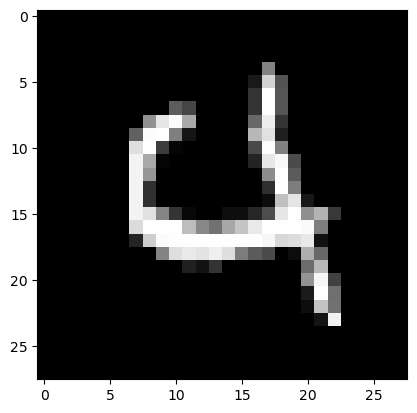

Prediction: 9, Label: 4


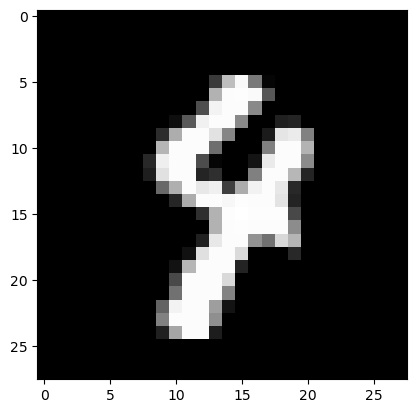

Prediction: 1, Label: 1


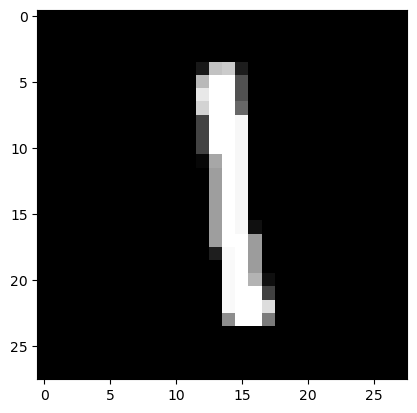

Prediction: 4, Label: 4


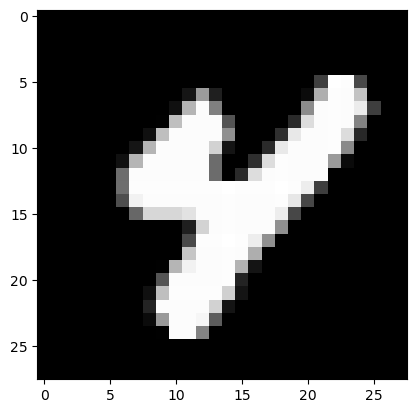

In [15]:

# ==========================
# Testing / Visualization
# ==========================
def test_prediction(index, X=X_train, Y=Y_train):
    image = X[:, index].reshape(-1,1)
    pred = get_predictions(forward_prop(W1, b1, W2, b2, image)[3])
    label = Y[index]
    print(f"Prediction: {pred[0]}, Label: {label}")
    
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.show()

# Example tests
for i in range(4):
    test_prediction(i)


In [16]:

# ==========================
# Dev Set Evaluation
# ==========================
dev_preds = get_predictions(forward_prop(W1, b1, W2, b2, X_dev)[3])
print("Development Set Accuracy:", get_accuracy(dev_preds, Y_dev))


Development Set Accuracy: 0.903


# Project Summary

## Model Performance

- The neural network was trained from scratch using **NumPy** on a MNIST-style dataset.
- The network architecture includes:
  - Input layer: 784 neurons (28x28 pixels)
  - Hidden layer: 10 neurons with **ReLU** activation
  - Output layer: 10 neurons with **Softmax** activation for multi-class classification
- **Training results**:
  - Final training accuracy (approx.): 89.9%
  - Development set accuracy: 90.3%
- The model demonstrates effective learning from the dataset and achieves high accuracy on unseen data.

## Key Observations

- Accuracy gradually improves over iterations, stabilizing around ~90% on the dev set.
- Using proper weight initialization and learning rate significantly impacts convergence.
- Visual inspection of sample predictions shows correct classification for most images.

## Conclusion

This project successfully implements a simple neural network from scratch, demonstrating core principles of forward propagation, backpropagation, gradient descent, and multi-class classification. The results validate the effectiveness of the approach without using high-level frameworks like TensorFlow or PyTorch.
